In [1]:
import numpy as np
from dataclasses import dataclass
import json
import glob
from ase.calculators.calculator import Calculator
from sch_benchmark import Hutchison, IonicConformer, Rotamer, Tautomer
import matplotlib.pyplot as plt
from xtb.ase.calculator import XTB


class FakeCalc(Calculator):

    def get_potential_energy(self, atoms, force_consistent=None):
        return 0.0

    def get_forces(self, atoms=None):
        return np.zeros((len(atoms), 3))

100%|██████████| 50/50 [00:13<00:00,  3.78it/s]


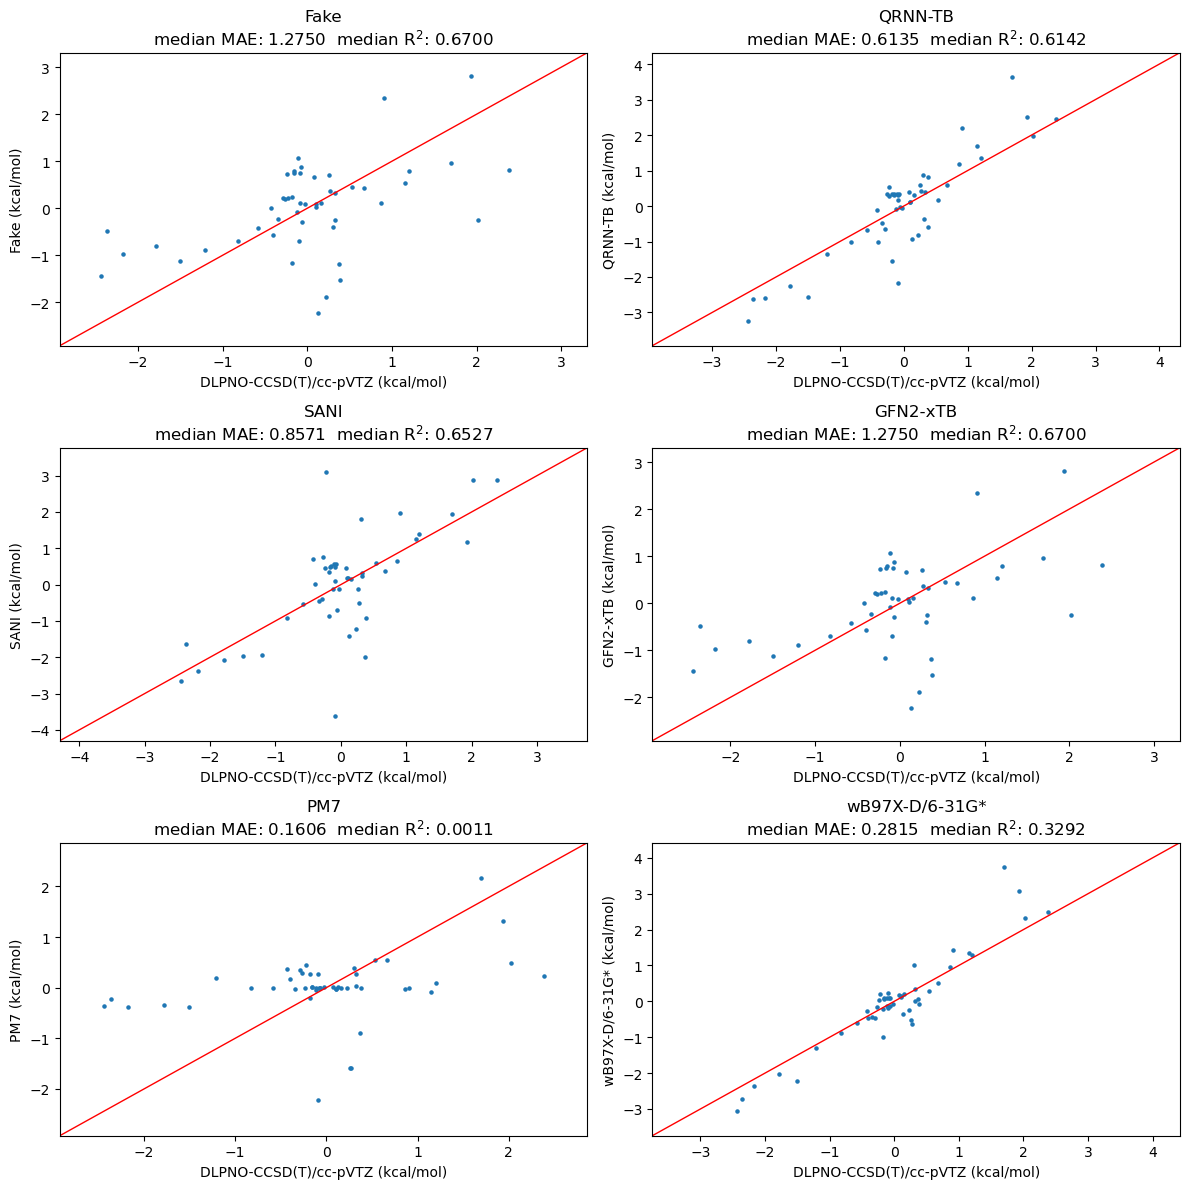

In [2]:
calc = XTB(method="GFN2-xTB")
hutchison = Hutchison()
hutchison.tasks = hutchison.tasks[:50]
hutchison.inference("Fake", calc)

hutchison.analyse(methods=["Fake", "QRNN-TB", "SANI", "GFN2-xTB", "PM7", "wB97X-D/6-31G*"])

  0%|          | 0/50 [00:00<?, ?it/s]

                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 22:44:00    -1170.178969*       0.6803
BFGSLineSearch:    1[  2] 22:44:00    -1170.200804*       0.3721
BFGSLineSearch:    2[  4] 22:44:00    -1170.211833*       0.2425
BFGSLineSearch:    3[  6] 22:44:00    -1170.219603*       0.2007
BFGSLineSearch:    4[  8] 22:44:01    -1170.224821*       0.2325
BFGSLineSearch:    5[ 10] 22:44:01    -1170.230391*       0.1493
BFGSLineSearch:    6[ 12] 22:44:01    -1170.232974*       0.1440
BFGSLineSearch:    7[ 14] 22:44:01    -1170.235894*       0.1483
BFGSLineSearch:    8[ 16] 22:44:01    -1170.238924*       0.1446
BFGSLineSearch:    9[ 18] 22:44:02    -1170.242188*       0.2557
BFGSLineSearch:   10[ 20] 22:44:02    -1170.246238*       0.2160
BFGSLineSearch:   11[ 22] 22:44:02    -1170.248824*       0.1291
BFGSLineSearch:   12[ 24] 22:44:02    -1170.250919*       0.1203
BFGSLineSearch:   13[ 26] 22:44:02    -11

  2%|▏         | 1/50 [00:08<07:14,  8.86s/it]

                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 22:44:09    -1170.136398*       0.6670
BFGSLineSearch:    1[  2] 22:44:09    -1170.155989*       0.3587
BFGSLineSearch:    2[  4] 22:44:09    -1170.165886*       0.2447
BFGSLineSearch:    3[  6] 22:44:09    -1170.172065*       0.1719
BFGSLineSearch:    4[  8] 22:44:10    -1170.176813*       0.1992
BFGSLineSearch:    5[ 10] 22:44:10    -1170.181973*       0.1943
BFGSLineSearch:    6[ 12] 22:44:10    -1170.185123*       0.1444
BFGSLineSearch:    7[ 14] 22:44:10    -1170.188638*       0.1961
BFGSLineSearch:    8[ 16] 22:44:10    -1170.192570*       0.1937
BFGSLineSearch:    9[ 18] 22:44:10    -1170.196075*       0.2853
BFGSLineSearch:   10[ 20] 22:44:11    -1170.201124*       0.2356
BFGSLineSearch:   11[ 22] 22:44:11    -1170.203839*       0.1250
BFGSLineSearch:   12[ 24] 22:44:11    -1170.206102*       0.1280
BFGSLineSearch:   13[ 26] 22:44:11    -11

  4%|▍         | 2/50 [00:17<07:07,  8.90s/it]

                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 22:44:18    -1170.029681*       0.6188
BFGSLineSearch:    1[  2] 22:44:18    -1170.052470*       0.5767
BFGSLineSearch:    2[  4] 22:44:18    -1170.069443*       0.3580
BFGSLineSearch:    3[  6] 22:44:18    -1170.081837*       0.3065
BFGSLineSearch:    4[  8] 22:44:19    -1170.091613*       0.2876
BFGSLineSearch:    5[ 10] 22:44:19    -1170.100563*       0.2759
BFGSLineSearch:    6[ 12] 22:44:19    -1170.104825*       0.1989
BFGSLineSearch:    7[ 14] 22:44:19    -1170.109472*       0.1982
BFGSLineSearch:    8[ 16] 22:44:19    -1170.114298*       0.1513
BFGSLineSearch:    9[ 18] 22:44:19    -1170.117916*       0.2261
BFGSLineSearch:   10[ 20] 22:44:20    -1170.123863*       0.2485
BFGSLineSearch:   11[ 22] 22:44:20    -1170.126866*       0.1855
BFGSLineSearch:   12[ 24] 22:44:20    -1170.129840*       0.1554
BFGSLineSearch:   13[ 26] 22:44:20    -11

  6%|▌         | 3/50 [00:36<10:30, 13.41s/it]

                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 22:44:36    -1170.096130*       0.6339
BFGSLineSearch:    1[  2] 22:44:37    -1170.121405*       0.5046
BFGSLineSearch:    2[  4] 22:44:37    -1170.137756*       0.3758
BFGSLineSearch:    3[  6] 22:44:37    -1170.151015*       0.2813
BFGSLineSearch:    4[  8] 22:44:37    -1170.159145*       0.2618
BFGSLineSearch:    5[ 10] 22:44:38    -1170.166545*       0.2067
BFGSLineSearch:    6[ 12] 22:44:38    -1170.169657*       0.1640
BFGSLineSearch:    7[ 14] 22:44:38    -1170.172438*       0.1556
BFGSLineSearch:    8[ 16] 22:44:38    -1170.176104*       0.1376
BFGSLineSearch:    9[ 18] 22:44:38    -1170.179182*       0.2015
BFGSLineSearch:   10[ 20] 22:44:38    -1170.184316*       0.2222
BFGSLineSearch:   11[ 22] 22:44:39    -1170.187604*       0.1876
BFGSLineSearch:   12[ 24] 22:44:39    -1170.190490*       0.2186
BFGSLineSearch:   13[ 26] 22:44:39    -11

  8%|▊         | 4/50 [00:48<09:56, 12.96s/it]

                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 22:44:49    -1170.112818*       0.6330
BFGSLineSearch:    1[  2] 22:44:49    -1170.136447*       0.4971
BFGSLineSearch:    2[  4] 22:44:49    -1170.152514*       0.3404
BFGSLineSearch:    3[  6] 22:44:49    -1170.164587*       0.2884
BFGSLineSearch:    4[  8] 22:44:50    -1170.172662*       0.2655
BFGSLineSearch:    5[ 10] 22:44:50    -1170.181513*       0.2463
BFGSLineSearch:    6[ 12] 22:44:50    -1170.185718*       0.2143
BFGSLineSearch:    7[ 14] 22:44:50    -1170.189636*       0.1652
BFGSLineSearch:    8[ 16] 22:44:50    -1170.194289*       0.1600
BFGSLineSearch:    9[ 18] 22:44:51    -1170.197831*       0.2213
BFGSLineSearch:   10[ 20] 22:44:51    -1170.203024*       0.2226
BFGSLineSearch:   11[ 22] 22:44:51    -1170.205661*       0.1704
BFGSLineSearch:   12[ 24] 22:44:51    -1170.207872*       0.1918
BFGSLineSearch:   13[ 26] 22:44:51    -11

 10%|█         | 5/50 [01:02<10:02, 13.39s/it]

                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 22:45:03    -1170.269398*       0.6009
BFGSLineSearch:    1[  2] 22:45:03    -1170.295243*       0.5166
BFGSLineSearch:    2[  4] 22:45:03    -1170.310951*       0.3713
BFGSLineSearch:    3[  6] 22:45:04    -1170.324974*       0.2893
BFGSLineSearch:    4[  8] 22:45:04    -1170.333613*       0.3075
BFGSLineSearch:    5[ 10] 22:45:04    -1170.343140*       0.2639
BFGSLineSearch:    6[ 12] 22:45:04    -1170.347320*       0.2069
BFGSLineSearch:    7[ 14] 22:45:04    -1170.351684*       0.1698
BFGSLineSearch:    8[ 16] 22:45:04    -1170.356165*       0.1555
BFGSLineSearch:    9[ 18] 22:45:05    -1170.359932*       0.1824
BFGSLineSearch:   10[ 20] 22:45:05    -1170.364771*       0.2425
BFGSLineSearch:   11[ 22] 22:45:05    -1170.367420*       0.1495
BFGSLineSearch:   12[ 24] 22:45:05    -1170.369913*       0.1818
BFGSLineSearch:   13[ 26] 22:45:05    -11

 12%|█▏        | 6/50 [01:12<08:47, 11.99s/it]

                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 22:45:12    -1170.231288*       0.6825
BFGSLineSearch:    1[  2] 22:45:12    -1170.254885*       0.5167
BFGSLineSearch:    2[  4] 22:45:13    -1170.272086*       0.3249
BFGSLineSearch:    3[  6] 22:45:13    -1170.284309*       0.2963
BFGSLineSearch:    4[  8] 22:45:13    -1170.293482*       0.2768
BFGSLineSearch:    5[ 10] 22:45:13    -1170.301806*       0.2593
BFGSLineSearch:    6[ 12] 22:45:13    -1170.305961*       0.1923
BFGSLineSearch:    7[ 14] 22:45:14    -1170.310349*       0.1898
BFGSLineSearch:    8[ 16] 22:45:14    -1170.315018*       0.1575
BFGSLineSearch:    9[ 18] 22:45:14    -1170.318657*       0.2745
BFGSLineSearch:   10[ 20] 22:45:14    -1170.324574*       0.2779
BFGSLineSearch:   11[ 22] 22:45:14    -1170.327796*       0.1673
BFGSLineSearch:   12[ 24] 22:45:15    -1170.330439*       0.2088
BFGSLineSearch:   13[ 26] 22:45:15    -11

 14%|█▍        | 7/50 [01:26<09:00, 12.56s/it]

                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 22:45:26    -1170.182310*       0.6612
BFGSLineSearch:    1[  2] 22:45:26    -1170.206474*       0.5052
BFGSLineSearch:    2[  4] 22:45:26    -1170.221111*       0.3356
BFGSLineSearch:    3[  6] 22:45:27    -1170.232854*       0.2777
BFGSLineSearch:    4[  8] 22:45:27    -1170.240568*       0.2515
BFGSLineSearch:    5[ 10] 22:45:27    -1170.248816*       0.2113
BFGSLineSearch:    6[ 12] 22:45:27    -1170.252929*       0.2030
BFGSLineSearch:    7[ 14] 22:45:27    -1170.256789*       0.1711
BFGSLineSearch:    8[ 16] 22:45:28    -1170.261365*       0.1729
BFGSLineSearch:    9[ 18] 22:45:28    -1170.264674*       0.2246
BFGSLineSearch:   10[ 20] 22:45:28    -1170.269839*       0.1996
BFGSLineSearch:   11[ 22] 22:45:28    -1170.272590*       0.1673
BFGSLineSearch:   12[ 24] 22:45:28    -1170.274559*       0.1542
BFGSLineSearch:   13[ 26] 22:45:29    -11

 16%|█▌        | 8/50 [01:34<07:56, 11.34s/it]

                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 22:45:35    -1170.200323*       0.6380
BFGSLineSearch:    1[  2] 22:45:35    -1170.224643*       0.4985
BFGSLineSearch:    2[  4] 22:45:35    -1170.240221*       0.3422
BFGSLineSearch:    3[  6] 22:45:35    -1170.252187*       0.2744
BFGSLineSearch:    4[  8] 22:45:35    -1170.260461*       0.2872
BFGSLineSearch:    5[ 10] 22:45:36    -1170.268906*       0.2691
BFGSLineSearch:    6[ 12] 22:45:36    -1170.273493*       0.1974
BFGSLineSearch:    7[ 14] 22:45:36    -1170.277684*       0.1877
BFGSLineSearch:    8[ 16] 22:45:36    -1170.282695*       0.1686
BFGSLineSearch:    9[ 18] 22:45:36    -1170.286510*       0.2180
BFGSLineSearch:   10[ 20] 22:45:37    -1170.291636*       0.2612
BFGSLineSearch:   11[ 22] 22:45:37    -1170.294440*       0.1745
BFGSLineSearch:   12[ 24] 22:45:37    -1170.296838*       0.2170
BFGSLineSearch:   13[ 26] 22:45:37    -11

 18%|█▊        | 9/50 [01:47<08:09, 11.93s/it]

                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 22:45:48    -1170.191447*       0.6389
BFGSLineSearch:    1[  2] 22:45:48    -1170.215513*       0.5028
BFGSLineSearch:    2[  4] 22:45:48    -1170.231363*       0.3424
BFGSLineSearch:    3[  6] 22:45:48    -1170.243599*       0.2763
BFGSLineSearch:    4[  8] 22:45:49    -1170.251954*       0.2942
BFGSLineSearch:    5[ 10] 22:45:49    -1170.260513*       0.2659
BFGSLineSearch:    6[ 12] 22:45:49    -1170.265082*       0.2069
BFGSLineSearch:    7[ 14] 22:45:49    -1170.269243*       0.1838
BFGSLineSearch:    8[ 16] 22:45:49    -1170.274318*       0.1735
BFGSLineSearch:    9[ 18] 22:45:50    -1170.278079*       0.2297
BFGSLineSearch:   10[ 20] 22:45:50    -1170.283155*       0.2512
BFGSLineSearch:   11[ 22] 22:45:50    -1170.285954*       0.1749
BFGSLineSearch:   12[ 24] 22:45:50    -1170.288390*       0.2210
BFGSLineSearch:   13[ 26] 22:45:50    -11

 20%|██        | 10/50 [02:01<08:13, 12.34s/it]

                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 22:46:01    -1514.818606*       1.3615
BFGSLineSearch:    1[  2] 22:46:02    -1514.891742*       0.4086
BFGSLineSearch:    2[  4] 22:46:02    -1514.899976*       0.5048
BFGSLineSearch:    3[  6] 22:46:02    -1514.906184*       0.2159
BFGSLineSearch:    4[  8] 22:46:02    -1514.910725*       0.2309
BFGSLineSearch:    5[ 10] 22:46:03    -1514.914817*       0.1367
BFGSLineSearch:    6[ 12] 22:46:03    -1514.918267*       0.2454
BFGSLineSearch:    7[ 14] 22:46:03    -1514.920536*       0.1471
BFGSLineSearch:    8[ 16] 22:46:03    -1514.922975*       0.1332
BFGSLineSearch:    9[ 18] 22:46:04    -1514.924951*       0.1222
BFGSLineSearch:   10[ 20] 22:46:04    -1514.926464*       0.0700
BFGSLineSearch:   11[ 22] 22:46:04    -1514.927223*       0.0536
BFGSLineSearch:   12[ 24] 22:46:04    -1514.927682*       0.0593
BFGSLineSearch:   13[ 26] 22:46:04    -15

 22%|██▏       | 11/50 [02:13<07:57, 12.24s/it]

                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 22:46:13    -1514.425956*       1.3985
BFGSLineSearch:    1[  2] 22:46:14    -1514.503582*       0.3931
BFGSLineSearch:    2[  4] 22:46:14    -1514.514629*       0.5977
BFGSLineSearch:    3[  6] 22:46:14    -1514.522084*       0.2386
BFGSLineSearch:    4[  8] 22:46:15    -1514.527938*       0.2392
BFGSLineSearch:    5[ 10] 22:46:15    -1514.533055*       0.1671
BFGSLineSearch:    6[ 12] 22:46:15    -1514.538968*       0.2049
BFGSLineSearch:    7[ 14] 22:46:16    -1514.542188*       0.1739
BFGSLineSearch:    8[ 16] 22:46:16    -1514.546561*       0.1533
BFGSLineSearch:    9[ 18] 22:46:17    -1514.551037*       0.1986
BFGSLineSearch:   10[ 20] 22:46:17    -1514.553792*       0.1192
BFGSLineSearch:   11[ 22] 22:46:17    -1514.556224*       0.1095
BFGSLineSearch:   12[ 24] 22:46:17    -1514.558359*       0.1519
BFGSLineSearch:   13[ 26] 22:46:18    -15

 24%|██▍       | 12/50 [02:28<08:16, 13.06s/it]

                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 22:46:28    -1514.831436*       1.3861
BFGSLineSearch:    1[  2] 22:46:29    -1514.905180*       0.4446
BFGSLineSearch:    2[  4] 22:46:29    -1514.913319*       0.4618
BFGSLineSearch:    3[  6] 22:46:29    -1514.920722*       0.2069
BFGSLineSearch:    4[  8] 22:46:29    -1514.925738*       0.2229
BFGSLineSearch:    5[ 10] 22:46:30    -1514.930381*       0.1723
BFGSLineSearch:    6[ 12] 22:46:30    -1514.934601*       0.1452
BFGSLineSearch:    7[ 14] 22:46:30    -1514.936499*       0.1460
BFGSLineSearch:    8[ 16] 22:46:30    -1514.938832*       0.1228
BFGSLineSearch:    9[ 18] 22:46:31    -1514.940690*       0.1681
BFGSLineSearch:   10[ 20] 22:46:31    -1514.942357*       0.0943
BFGSLineSearch:   11[ 22] 22:46:31    -1514.943450*       0.0754
BFGSLineSearch:   12[ 24] 22:46:31    -1514.944267*       0.0894
BFGSLineSearch:   13[ 26] 22:46:31    -15

 26%|██▌       | 13/50 [02:42<08:16, 13.42s/it]

                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 22:46:42    -1514.713292*       1.3767
BFGSLineSearch:    1[  2] 22:46:43    -1514.787739*       0.4329
BFGSLineSearch:    2[  4] 22:46:43    -1514.795690*       0.5097
BFGSLineSearch:    3[  6] 22:46:44    -1514.801421*       0.2113
BFGSLineSearch:    4[  8] 22:46:44    -1514.805544*       0.2075
BFGSLineSearch:    5[ 10] 22:46:44    -1514.809255*       0.1434
BFGSLineSearch:    6[ 12] 22:46:44    -1514.812750*       0.1737
BFGSLineSearch:    7[ 14] 22:46:44    -1514.814489*       0.1322
BFGSLineSearch:    8[ 16] 22:46:45    -1514.816604*       0.1128
BFGSLineSearch:    9[ 18] 22:46:45    -1514.818297*       0.1361
BFGSLineSearch:   10[ 20] 22:46:45    -1514.819293*       0.0766
BFGSLineSearch:   11[ 22] 22:46:45    -1514.820099*       0.0717
BFGSLineSearch:   12[ 24] 22:46:45    -1514.820748*       0.0764
BFGSLineSearch:   13[ 26] 22:46:46    -15

 28%|██▊       | 14/50 [02:58<08:27, 14.10s/it]

                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 22:46:58    -1514.713646*       1.3791
BFGSLineSearch:    1[  2] 22:46:59    -1514.788405*       0.4330
BFGSLineSearch:    2[  4] 22:46:59    -1514.796343*       0.5104
BFGSLineSearch:    3[  6] 22:46:59    -1514.802072*       0.2108
BFGSLineSearch:    4[  8] 22:46:59    -1514.806173*       0.2067
BFGSLineSearch:    5[ 10] 22:47:00    -1514.809873*       0.1430
BFGSLineSearch:    6[ 12] 22:47:00    -1514.813333*       0.1725
BFGSLineSearch:    7[ 14] 22:47:00    -1514.815054*       0.1313
BFGSLineSearch:    8[ 16] 22:47:00    -1514.817138*       0.1125
BFGSLineSearch:    9[ 18] 22:47:00    -1514.818811*       0.1355
BFGSLineSearch:   10[ 20] 22:47:01    -1514.819797*       0.0761
BFGSLineSearch:   11[ 22] 22:47:01    -1514.820590*       0.0710
BFGSLineSearch:   12[ 24] 22:47:01    -1514.821228*       0.0759
BFGSLineSearch:   13[ 26] 22:47:01    -15

 30%|███       | 15/50 [03:13<08:30, 14.58s/it]

                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 22:47:14    -1514.831013*       1.3907
BFGSLineSearch:    1[  2] 22:47:14    -1514.904784*       0.4454
BFGSLineSearch:    2[  4] 22:47:15    -1514.912936*       0.4613
BFGSLineSearch:    3[  6] 22:47:15    -1514.920308*       0.2055
BFGSLineSearch:    4[  8] 22:47:15    -1514.925313*       0.2232
BFGSLineSearch:    5[ 10] 22:47:15    -1514.929988*       0.1728
BFGSLineSearch:    6[ 12] 22:47:16    -1514.934258*       0.1470
BFGSLineSearch:    7[ 14] 22:47:16    -1514.936198*       0.1469
BFGSLineSearch:    8[ 16] 22:47:16    -1514.938582*       0.1240
BFGSLineSearch:    9[ 18] 22:47:16    -1514.940476*       0.1699
BFGSLineSearch:   10[ 20] 22:47:16    -1514.942184*       0.0965
BFGSLineSearch:   11[ 22] 22:47:17    -1514.943304*       0.0753
BFGSLineSearch:   12[ 24] 22:47:17    -1514.944144*       0.0903
BFGSLineSearch:   13[ 26] 22:47:17    -15

 32%|███▏      | 16/50 [03:26<08:00, 14.15s/it]

                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 22:47:27    -1514.714932*       1.3772
BFGSLineSearch:    1[  2] 22:47:27    -1514.789326*       0.4309
BFGSLineSearch:    2[  4] 22:47:28    -1514.797261*       0.5076
BFGSLineSearch:    3[  6] 22:47:28    -1514.802960*       0.2126
BFGSLineSearch:    4[  8] 22:47:28    -1514.807076*       0.2071
BFGSLineSearch:    5[ 10] 22:47:29    -1514.810784*       0.1434
BFGSLineSearch:    6[ 12] 22:47:29    -1514.814258*       0.1734
BFGSLineSearch:    7[ 14] 22:47:29    -1514.815989*       0.1320
BFGSLineSearch:    8[ 16] 22:47:29    -1514.818099*       0.1131
BFGSLineSearch:    9[ 18] 22:47:30    -1514.819792*       0.1358
BFGSLineSearch:   10[ 20] 22:47:30    -1514.820783*       0.0759
BFGSLineSearch:   11[ 22] 22:47:30    -1514.821574*       0.0712
BFGSLineSearch:   12[ 24] 22:47:30    -1514.822209*       0.0766
BFGSLineSearch:   13[ 26] 22:47:30    -15

 34%|███▍      | 17/50 [03:44<08:19, 15.15s/it]

                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 22:47:44    -1514.830340*       1.3918
BFGSLineSearch:    1[  2] 22:47:45    -1514.904155*       0.4470
BFGSLineSearch:    2[  4] 22:47:45    -1514.912302*       0.4619
BFGSLineSearch:    3[  6] 22:47:45    -1514.919696*       0.2033
BFGSLineSearch:    4[  8] 22:47:46    -1514.924740*       0.2228
BFGSLineSearch:    5[ 10] 22:47:46    -1514.929450*       0.1748
BFGSLineSearch:    6[ 12] 22:47:46    -1514.933745*       0.1480
BFGSLineSearch:    7[ 14] 22:47:46    -1514.935701*       0.1477
BFGSLineSearch:    8[ 16] 22:47:47    -1514.938110*       0.1242
BFGSLineSearch:    9[ 18] 22:47:47    -1514.940021*       0.1701
BFGSLineSearch:   10[ 20] 22:47:47    -1514.941735*       0.0963
BFGSLineSearch:   11[ 22] 22:47:47    -1514.942859*       0.0758
BFGSLineSearch:   12[ 24] 22:47:48    -1514.943704*       0.0919
BFGSLineSearch:   13[ 26] 22:47:48    -15

 36%|███▌      | 18/50 [03:58<07:56, 14.88s/it]

                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 22:47:59    -1514.820226*       1.3549
BFGSLineSearch:    1[  2] 22:47:59    -1514.892932*       0.4093
BFGSLineSearch:    2[  4] 22:48:00    -1514.901066*       0.5045
BFGSLineSearch:    3[  6] 22:48:00    -1514.907324*       0.2146
BFGSLineSearch:    4[  8] 22:48:00    -1514.911856*       0.2309
BFGSLineSearch:    5[ 10] 22:48:01    -1514.915966*       0.1369
BFGSLineSearch:    6[ 12] 22:48:01    -1514.919392*       0.2449
BFGSLineSearch:    7[ 14] 22:48:01    -1514.921679*       0.1473
BFGSLineSearch:    8[ 16] 22:48:01    -1514.924103*       0.1345
BFGSLineSearch:    9[ 18] 22:48:02    -1514.926049*       0.1210
BFGSLineSearch:   10[ 20] 22:48:02    -1514.927544*       0.0699
BFGSLineSearch:   11[ 22] 22:48:02    -1514.928287*       0.0537
BFGSLineSearch:   12[ 24] 22:48:03    -1514.928730*       0.0571
BFGSLineSearch:   13[ 26] 22:48:03    -15

 38%|███▊      | 19/50 [04:12<07:31, 14.56s/it]

                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 22:48:12    -1514.669823*       1.3807
BFGSLineSearch:    1[  2] 22:48:13    -1514.744259*       0.4448
BFGSLineSearch:    2[  4] 22:48:13    -1514.752370*       0.5110
BFGSLineSearch:    3[  6] 22:48:14    -1514.758776*       0.2025
BFGSLineSearch:    4[  8] 22:48:14    -1514.763257*       0.2094
BFGSLineSearch:    5[ 10] 22:48:14    -1514.767496*       0.1577
BFGSLineSearch:    6[ 12] 22:48:14    -1514.772005*       0.1696
BFGSLineSearch:    7[ 14] 22:48:15    -1514.774178*       0.1462
BFGSLineSearch:    8[ 16] 22:48:15    -1514.776568*       0.1270
BFGSLineSearch:    9[ 18] 22:48:15    -1514.778542*       0.1439
BFGSLineSearch:   10[ 20] 22:48:15    -1514.779841*       0.0889
BFGSLineSearch:   11[ 22] 22:48:16    -1514.780971*       0.0850
BFGSLineSearch:   12[ 24] 22:48:16    -1514.781941*       0.1015
BFGSLineSearch:   13[ 26] 22:48:16    -15

 40%|████      | 20/50 [04:25<07:06, 14.21s/it]

                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 22:48:26    -1609.665611*       0.9249
BFGSLineSearch:    1[  2] 22:48:26    -1609.705982*       0.7964
BFGSLineSearch:    2[  4] 22:48:26    -1609.721581*       0.3086
BFGSLineSearch:    3[  6] 22:48:27    -1609.730529*       0.2973
BFGSLineSearch:    4[  8] 22:48:27    -1609.736242*       0.2029
BFGSLineSearch:    5[ 10] 22:48:27    -1609.739802*       0.2261
BFGSLineSearch:    6[ 12] 22:48:27    -1609.742151*       0.2030
BFGSLineSearch:    7[ 14] 22:48:28    -1609.744633*       0.1242
BFGSLineSearch:    8[ 16] 22:48:28    -1609.746223*       0.0672
BFGSLineSearch:    9[ 18] 22:48:28    -1609.747908*       0.1230
BFGSLineSearch:   10[ 20] 22:48:28    -1609.749507*       0.0739
BFGSLineSearch:   11[ 22] 22:48:29    -1609.750602*       0.1030
BFGSLineSearch:   12[ 24] 22:48:29    -1609.751803*       0.0772
BFGSLineSearch:   13[ 26] 22:48:29    -16

 42%|████▏     | 21/50 [04:38<06:42, 13.87s/it]

                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 22:48:39    -1610.315360*       0.7913
BFGSLineSearch:    1[  2] 22:48:39    -1610.352505*       0.8264
BFGSLineSearch:    2[  4] 22:48:39    -1610.364963*       0.4062
BFGSLineSearch:    3[  6] 22:48:40    -1610.373566*       0.3199
BFGSLineSearch:    4[  8] 22:48:40    -1610.378855*       0.1666
BFGSLineSearch:    5[ 10] 22:48:40    -1610.381727*       0.2994
BFGSLineSearch:    6[ 12] 22:48:40    -1610.384014*       0.1460
BFGSLineSearch:    7[ 14] 22:48:41    -1610.386232*       0.1332
BFGSLineSearch:    8[ 16] 22:48:41    -1610.387629*       0.0576
BFGSLineSearch:    9[ 18] 22:48:41    -1610.388739*       0.1050
BFGSLineSearch:   10[ 20] 22:48:41    -1610.389611*       0.0734
BFGSLineSearch:   11[ 22] 22:48:41    -1610.390208*       0.0628
BFGSLineSearch:   12[ 24] 22:48:42    -1610.390925*       0.0572
BFGSLineSearch:   13[ 26] 22:48:42    -16

 44%|████▍     | 22/50 [04:48<05:54, 12.68s/it]

                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 22:48:49    -1610.362442*       0.8239
BFGSLineSearch:    1[  2] 22:48:49    -1610.400704*       0.8359
BFGSLineSearch:    2[  4] 22:48:49    -1610.414189*       0.3786
BFGSLineSearch:    3[  6] 22:48:50    -1610.422419*       0.3094
BFGSLineSearch:    4[  8] 22:48:50    -1610.427127*       0.2078
BFGSLineSearch:    5[ 10] 22:48:50    -1610.429557*       0.2478
BFGSLineSearch:    6[ 12] 22:48:50    -1610.431645*       0.1420
BFGSLineSearch:    7[ 14] 22:48:51    -1610.433429*       0.1096
BFGSLineSearch:    8[ 16] 22:48:51    -1610.434499*       0.0520
BFGSLineSearch:    9[ 18] 22:48:51    -1610.435533*       0.0996
BFGSLineSearch:   10[ 20] 22:48:51    -1610.436493*       0.0769
BFGSLineSearch:   11[ 22] 22:48:51    -1610.437178*       0.0716
BFGSLineSearch:   12[ 24] 22:48:52    -1610.438022*       0.0592
BFGSLineSearch:   13[ 26] 22:48:52    -16

 46%|████▌     | 23/50 [05:01<05:39, 12.59s/it]

                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 22:49:01    -1610.183335*       0.8182
BFGSLineSearch:    1[  2] 22:49:01    -1610.221591*       0.8419
BFGSLineSearch:    2[  4] 22:49:02    -1610.234128*       0.4007
BFGSLineSearch:    3[  6] 22:49:02    -1610.242451*       0.3035
BFGSLineSearch:    4[  8] 22:49:02    -1610.247443*       0.1812
BFGSLineSearch:    5[ 10] 22:49:02    -1610.250139*       0.2796
BFGSLineSearch:    6[ 12] 22:49:03    -1610.252411*       0.1488
BFGSLineSearch:    7[ 14] 22:49:03    -1610.254890*       0.1369
BFGSLineSearch:    8[ 16] 22:49:03    -1610.256527*       0.0650
BFGSLineSearch:    9[ 18] 22:49:03    -1610.258187*       0.1488
BFGSLineSearch:   10[ 20] 22:49:04    -1610.259674*       0.1029
BFGSLineSearch:   11[ 22] 22:49:04    -1610.260675*       0.0828
BFGSLineSearch:   12[ 24] 22:49:04    -1610.261931*       0.0757
BFGSLineSearch:   13[ 26] 22:49:04    -16

 48%|████▊     | 24/50 [05:15<05:36, 12.96s/it]

                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 22:49:15    -1610.000824*       0.8454
BFGSLineSearch:    1[  2] 22:49:15    -1610.039814*       0.7883
BFGSLineSearch:    2[  4] 22:49:16    -1610.052931*       0.3555
BFGSLineSearch:    3[  6] 22:49:16    -1610.060525*       0.2879
BFGSLineSearch:    4[  8] 22:49:16    -1610.065145*       0.1751
BFGSLineSearch:    5[ 10] 22:49:16    -1610.067704*       0.1646
BFGSLineSearch:    6[ 12] 22:49:16    -1610.069113*       0.1939
BFGSLineSearch:    7[ 14] 22:49:17    -1610.070375*       0.1020
BFGSLineSearch:    8[ 16] 22:49:17    -1610.071274*       0.0564
BFGSLineSearch:    9[ 18] 22:49:17    -1610.072107*       0.1035
BFGSLineSearch:   10[ 20] 22:49:17    -1610.073056*       0.0525
BFGSLineSearch:   11[ 22] 22:49:18    -1610.073752*       0.0767
BFGSLineSearch:   12[ 24] 22:49:18    -1610.074475*       0.0538
BFGSLineSearch:   13[ 26] 22:49:18    -16

 50%|█████     | 25/50 [05:29<05:38, 13.53s/it]

                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 22:49:30    -1610.362752*       0.8044
BFGSLineSearch:    1[  2] 22:49:30    -1610.400963*       0.8236
BFGSLineSearch:    2[  4] 22:49:30    -1610.414248*       0.3731
BFGSLineSearch:    3[  6] 22:49:31    -1610.422376*       0.3081
BFGSLineSearch:    4[  8] 22:49:31    -1610.427049*       0.2070
BFGSLineSearch:    5[ 10] 22:49:31    -1610.429470*       0.2470
BFGSLineSearch:    6[ 12] 22:49:31    -1610.431548*       0.1413
BFGSLineSearch:    7[ 14] 22:49:32    -1610.433326*       0.1098
BFGSLineSearch:    8[ 16] 22:49:32    -1610.434394*       0.0525
BFGSLineSearch:    9[ 18] 22:49:32    -1610.435429*       0.1000
BFGSLineSearch:   10[ 20] 22:49:32    -1610.436409*       0.0781
BFGSLineSearch:   11[ 22] 22:49:32    -1610.437114*       0.0732
BFGSLineSearch:   12[ 24] 22:49:33    -1610.437986*       0.0601
BFGSLineSearch:   13[ 26] 22:49:33    -16

 52%|█████▏    | 26/50 [05:42<05:18, 13.27s/it]

                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 22:49:42    -1609.770521*       0.8069
BFGSLineSearch:    1[  2] 22:49:43    -1609.803723*       0.6296
BFGSLineSearch:    2[  4] 22:49:43    -1609.818445*       0.3154
BFGSLineSearch:    3[  6] 22:49:43    -1609.825476*       0.2589
BFGSLineSearch:    4[  8] 22:49:44    -1609.829435*       0.2211
BFGSLineSearch:    5[ 10] 22:49:44    -1609.831651*       0.1903
BFGSLineSearch:    6[ 12] 22:49:44    -1609.833863*       0.1275
BFGSLineSearch:    7[ 14] 22:49:44    -1609.835905*       0.1165
BFGSLineSearch:    8[ 16] 22:49:44    -1609.836800*       0.0679
BFGSLineSearch:    9[ 18] 22:49:45    -1609.837525*       0.0845
BFGSLineSearch:   10[ 20] 22:49:45    -1609.838272*       0.0493
BFGSLineSearch:   11[ 22] 22:49:45    -1609.838694*       0.0536
BFGSLineSearch:   12[ 24] 22:49:45    -1609.839103*       0.0350
BFGSLineSearch:   13[ 26] 22:49:45    -16

 54%|█████▍    | 27/50 [05:56<05:06, 13.34s/it]

                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 22:49:56    -1609.996869*       0.7824
BFGSLineSearch:    1[  2] 22:49:56    -1610.034840*       0.8056
BFGSLineSearch:    2[  4] 22:49:57    -1610.046617*       0.4093
BFGSLineSearch:    3[  6] 22:49:57    -1610.055847*       0.2972
BFGSLineSearch:    4[  8] 22:49:57    -1610.061324*       0.1908
BFGSLineSearch:    5[ 10] 22:49:57    -1610.064381*       0.2814
BFGSLineSearch:    6[ 12] 22:49:57    -1610.066468*       0.1338
BFGSLineSearch:    7[ 14] 22:49:58    -1610.068489*       0.1239
BFGSLineSearch:    8[ 16] 22:49:58    -1610.069603*       0.0706
BFGSLineSearch:    9[ 18] 22:49:58    -1610.070886*       0.0918
BFGSLineSearch:   10[ 20] 22:49:58    -1610.072254*       0.0765
BFGSLineSearch:   11[ 22] 22:49:58    -1610.073068*       0.0711
BFGSLineSearch:   12[ 24] 22:49:59    -1610.073984*       0.0794
BFGSLineSearch:   13[ 26] 22:49:59    -16

 56%|█████▌    | 28/50 [06:06<04:35, 12.51s/it]

                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 22:50:07    -1610.354464*       0.8028
BFGSLineSearch:    1[  2] 22:50:07    -1610.392975*       0.8368
BFGSLineSearch:    2[  4] 22:50:07    -1610.405758*       0.3920
BFGSLineSearch:    3[  6] 22:50:07    -1610.413855*       0.3041
BFGSLineSearch:    4[  8] 22:50:08    -1610.418612*       0.1912
BFGSLineSearch:    5[ 10] 22:50:08    -1610.421122*       0.2732
BFGSLineSearch:    6[ 12] 22:50:08    -1610.423218*       0.1398
BFGSLineSearch:    7[ 14] 22:50:08    -1610.425043*       0.1164
BFGSLineSearch:    8[ 16] 22:50:08    -1610.426144*       0.0529
BFGSLineSearch:    9[ 18] 22:50:09    -1610.427189*       0.0921
BFGSLineSearch:   10[ 20] 22:50:09    -1610.428084*       0.0738
BFGSLineSearch:   11[ 22] 22:50:09    -1610.428694*       0.0749
BFGSLineSearch:   12[ 24] 22:50:09    -1610.429411*       0.0560
BFGSLineSearch:   13[ 26] 22:50:09    -16

 58%|█████▊    | 29/50 [06:18<04:18, 12.33s/it]

                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 22:50:18    -1610.054094*       0.7942
BFGSLineSearch:    1[  2] 22:50:19    -1610.091508*       0.8516
BFGSLineSearch:    2[  4] 22:50:19    -1610.103863*       0.4110
BFGSLineSearch:    3[  6] 22:50:19    -1610.112834*       0.3394
BFGSLineSearch:    4[  8] 22:50:20    -1610.118509*       0.1782
BFGSLineSearch:    5[ 10] 22:50:20    -1610.121741*       0.2927
BFGSLineSearch:    6[ 12] 22:50:20    -1610.124098*       0.1447
BFGSLineSearch:    7[ 14] 22:50:20    -1610.126783*       0.1478
BFGSLineSearch:    8[ 16] 22:50:20    -1610.128408*       0.0736
BFGSLineSearch:    9[ 18] 22:50:21    -1610.129995*       0.1185
BFGSLineSearch:   10[ 20] 22:50:21    -1610.131591*       0.0824
BFGSLineSearch:   11[ 22] 22:50:21    -1610.132561*       0.0802
BFGSLineSearch:   12[ 24] 22:50:21    -1610.133688*       0.0776
BFGSLineSearch:   13[ 26] 22:50:21    -16

 60%|██████    | 30/50 [06:30<04:02, 12.12s/it]

                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 22:50:30    -1029.773381*       0.9647
BFGSLineSearch:    1[  2] 22:50:30    -1029.822030*       0.4707
BFGSLineSearch:    2[  4] 22:50:30    -1029.835481*       0.7042
BFGSLineSearch:    3[  6] 22:50:30    -1029.844482*       0.2838
BFGSLineSearch:    4[  8] 22:50:30    -1029.851249*       0.3045
BFGSLineSearch:    5[ 10] 22:50:30    -1029.854557*       0.3190
BFGSLineSearch:    6[ 12] 22:50:30    -1029.858485*       0.2039
BFGSLineSearch:    7[ 14] 22:50:30    -1029.861783*       0.1702
BFGSLineSearch:    8[ 16] 22:50:30    -1029.863797*       0.1113
BFGSLineSearch:    9[ 18] 22:50:30    -1029.866027*       0.1354
BFGSLineSearch:   10[ 20] 22:50:30    -1029.867604*       0.1183
BFGSLineSearch:   11[ 22] 22:50:30    -1029.869739*       0.1708
BFGSLineSearch:   12[ 24] 22:50:30    -1029.871714*       0.1432
BFGSLineSearch:   13[ 26] 22:50:30    -10

 62%|██████▏   | 31/50 [06:31<02:49,  8.95s/it]

                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 22:50:32    -1031.298953*       0.9911
BFGSLineSearch:    1[  2] 22:50:32    -1031.338014*       0.8879
BFGSLineSearch:    2[  4] 22:50:32    -1031.352721*       0.4759
BFGSLineSearch:    3[  6] 22:50:32    -1031.361702*       0.3693
BFGSLineSearch:    4[  8] 22:50:32    -1031.365412*       0.2184
BFGSLineSearch:    5[ 10] 22:50:32    -1031.370389*       0.2822
BFGSLineSearch:    6[ 12] 22:50:32    -1031.374548*       0.1959
BFGSLineSearch:    7[ 14] 22:50:32    -1031.377832*       0.2114
BFGSLineSearch:    8[ 16] 22:50:32    -1031.380937*       0.1285
BFGSLineSearch:    9[ 18] 22:50:32    -1031.383452*       0.1007
BFGSLineSearch:   10[ 20] 22:50:32    -1031.385248*       0.1022
BFGSLineSearch:   11[ 22] 22:50:32    -1031.387228*       0.1368
BFGSLineSearch:   12[ 24] 22:50:32    -1031.389316*       0.1340
BFGSLineSearch:   13[ 26] 22:50:32    -10

 64%|██████▍   | 32/50 [06:33<02:00,  6.67s/it]

                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 22:50:33    -1031.377926*       1.0355
BFGSLineSearch:    1[  2] 22:50:33    -1031.418019*       0.8922
BFGSLineSearch:    2[  4] 22:50:33    -1031.433252*       0.4374
BFGSLineSearch:    3[  6] 22:50:33    -1031.442015*       0.3475
BFGSLineSearch:    4[  8] 22:50:33    -1031.445038*       0.2489
BFGSLineSearch:    5[ 10] 22:50:33    -1031.450844*       0.3284
BFGSLineSearch:    6[ 12] 22:50:33    -1031.456429*       0.2636
BFGSLineSearch:    7[ 14] 22:50:33    -1031.462490*       0.3053
BFGSLineSearch:    8[ 16] 22:50:33    -1031.468172*       0.1666
BFGSLineSearch:    9[ 18] 22:50:33    -1031.472537*       0.1428
BFGSLineSearch:   10[ 20] 22:50:33    -1031.475791*       0.1185
BFGSLineSearch:   11[ 22] 22:50:33    -1031.478482*       0.1795
BFGSLineSearch:   12[ 24] 22:50:33    -1031.481064*       0.1178
BFGSLineSearch:   13[ 26] 22:50:33    -10

 66%|██████▌   | 33/50 [06:36<01:38,  5.77s/it]

                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 22:50:37    -2634.610830*       0.8446
BFGSLineSearch:    1[  2] 22:50:38    -2634.665511*       0.7932
BFGSLineSearch:    2[  4] 22:50:39    -2634.689572*       0.4537
BFGSLineSearch:    3[  6] 22:50:39    -2634.712560*       0.4690
BFGSLineSearch:    4[  8] 22:50:40    -2634.728394*       0.3345
BFGSLineSearch:    5[ 10] 22:50:41    -2634.737791*       0.3537
BFGSLineSearch:    6[ 12] 22:50:41    -2634.745309*       0.2238
BFGSLineSearch:    7[ 14] 22:50:42    -2634.752442*       0.1625
BFGSLineSearch:    8[ 16] 22:50:43    -2634.758095*       0.1889
BFGSLineSearch:    9[ 18] 22:50:43    -2634.762499*       0.1412
BFGSLineSearch:   10[ 20] 22:50:44    -2634.765834*       0.1158
BFGSLineSearch:   11[ 22] 22:50:45    -2634.769336*       0.1476
BFGSLineSearch:   12[ 24] 22:50:45    -2634.772564*       0.1863
BFGSLineSearch:   13[ 26] 22:50:46    -26

 68%|██████▊   | 34/50 [07:47<06:43, 25.20s/it]

                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 22:51:48    -2634.350302*       0.7875
BFGSLineSearch:    1[  2] 22:51:48    -2634.402499*       0.8597
BFGSLineSearch:    2[  4] 22:51:49    -2634.427771*       0.4458
BFGSLineSearch:    3[  6] 22:51:50    -2634.453346*       0.3536
BFGSLineSearch:    4[  8] 22:51:51    -2634.470136*       0.3562
BFGSLineSearch:    5[ 10] 22:51:52    -2634.481097*       0.3878
BFGSLineSearch:    6[ 12] 22:51:53    -2634.488500*       0.2118
BFGSLineSearch:    7[ 14] 22:51:54    -2634.495111*       0.1568
BFGSLineSearch:    8[ 16] 22:51:54    -2634.501802*       0.1877
BFGSLineSearch:    9[ 18] 22:51:55    -2634.507074*       0.1781
BFGSLineSearch:   10[ 20] 22:51:56    -2634.512128*       0.1537
BFGSLineSearch:   11[ 22] 22:51:56    -2634.516901*       0.1638
BFGSLineSearch:   12[ 24] 22:51:57    -2634.522051*       0.2355
BFGSLineSearch:   13[ 26] 22:51:58    -26

 70%|███████   | 35/50 [09:28<11:58, 47.88s/it]

                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 22:53:28    -2634.397916*       0.8600
BFGSLineSearch:    1[  2] 22:53:29    -2634.455646*       0.8262
BFGSLineSearch:    2[  4] 22:53:30    -2634.480086*       0.5261
BFGSLineSearch:    3[  6] 22:53:31    -2634.502730*       0.4534
BFGSLineSearch:    4[  8] 22:53:31    -2634.516152*       0.3893
BFGSLineSearch:    5[ 10] 22:53:32    -2634.524343*       0.3071
BFGSLineSearch:    6[ 12] 22:53:33    -2634.531371*       0.1776
BFGSLineSearch:    7[ 14] 22:53:33    -2634.536897*       0.1492
BFGSLineSearch:    8[ 16] 22:53:34    -2634.541083*       0.1577
BFGSLineSearch:    9[ 18] 22:53:34    -2634.544431*       0.1396
BFGSLineSearch:   10[ 20] 22:53:35    -2634.547409*       0.0957
BFGSLineSearch:   11[ 22] 22:53:35    -2634.550184*       0.1826
BFGSLineSearch:   12[ 24] 22:53:36    -2634.552597*       0.1834
BFGSLineSearch:   13[ 26] 22:53:37    -26

 72%|███████▏  | 36/50 [10:59<14:12, 60.89s/it]

                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 22:55:00    -2634.552249*       0.7987
BFGSLineSearch:    1[  2] 22:55:01    -2634.602680*       0.7319
BFGSLineSearch:    2[  4] 22:55:01    -2634.624712*       0.4132
BFGSLineSearch:    3[  6] 22:55:02    -2634.644178*       0.2784
BFGSLineSearch:    4[  8] 22:55:03    -2634.657374*       0.2300
BFGSLineSearch:    5[ 10] 22:55:04    -2634.663542*       0.2927
BFGSLineSearch:    6[ 12] 22:55:04    -2634.668471*       0.2269
BFGSLineSearch:    7[ 14] 22:55:05    -2634.672463*       0.1397
BFGSLineSearch:    8[ 16] 22:55:06    -2634.675141*       0.1335
BFGSLineSearch:    9[ 18] 22:55:06    -2634.677340*       0.1217
BFGSLineSearch:   10[ 20] 22:55:07    -2634.679091*       0.0974
BFGSLineSearch:   11[ 22] 22:55:07    -2634.680445*       0.1128
BFGSLineSearch:   12[ 24] 22:55:08    -2634.682047*       0.1373
BFGSLineSearch:   13[ 26] 22:55:09    -26

 74%|███████▍  | 37/50 [11:55<12:53, 59.47s/it]

                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 22:55:56    -2634.605378*       0.8314
BFGSLineSearch:    1[  2] 22:55:57    -2634.654513*       0.9122
BFGSLineSearch:    2[  4] 22:55:57    -2634.674620*       0.5159
BFGSLineSearch:    3[  6] 22:55:58    -2634.695587*       0.3073
BFGSLineSearch:    4[  8] 22:55:59    -2634.709685*       0.3024
BFGSLineSearch:    5[ 10] 22:55:59    -2634.718333*       0.3608
BFGSLineSearch:    6[ 12] 22:56:00    -2634.724938*       0.2658
BFGSLineSearch:    7[ 14] 22:56:01    -2634.731116*       0.1803
BFGSLineSearch:    8[ 16] 22:56:01    -2634.735539*       0.1317
BFGSLineSearch:    9[ 18] 22:56:02    -2634.739628*       0.1435
BFGSLineSearch:   10[ 20] 22:56:02    -2634.742837*       0.1220
BFGSLineSearch:   11[ 22] 22:56:03    -2634.745685*       0.1787
BFGSLineSearch:   12[ 24] 22:56:04    -2634.748039*       0.1610
BFGSLineSearch:   13[ 26] 22:56:04    -26

 76%|███████▌  | 38/50 [13:13<12:59, 64.99s/it]

                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 22:57:14    -2634.743045*       0.8501
BFGSLineSearch:    1[  2] 22:57:14    -2634.793746*       0.9055
BFGSLineSearch:    2[  4] 22:57:15    -2634.814385*       0.5022
BFGSLineSearch:    3[  6] 22:57:16    -2634.835029*       0.2801
BFGSLineSearch:    4[  8] 22:57:17    -2634.848285*       0.3382
BFGSLineSearch:    5[ 10] 22:57:17    -2634.855665*       0.3567
BFGSLineSearch:    6[ 12] 22:57:18    -2634.861313*       0.2492
BFGSLineSearch:    7[ 14] 22:57:19    -2634.866436*       0.1580
BFGSLineSearch:    8[ 16] 22:57:19    -2634.870278*       0.1756
BFGSLineSearch:    9[ 18] 22:57:20    -2634.874175*       0.1613
BFGSLineSearch:   10[ 20] 22:57:21    -2634.877285*       0.1381
BFGSLineSearch:   11[ 22] 22:57:21    -2634.880262*       0.1860
BFGSLineSearch:   12[ 24] 22:57:22    -2634.883387*       0.2045
BFGSLineSearch:   13[ 26] 22:57:22    -26

 78%|███████▊  | 39/50 [14:15<11:44, 64.00s/it]

                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 22:58:15    -2634.535579*       0.8441
BFGSLineSearch:    1[  2] 22:58:16    -2634.584009*       0.9374
BFGSLineSearch:    2[  4] 22:58:17    -2634.604363*       0.5202
BFGSLineSearch:    3[  6] 22:58:17    -2634.624138*       0.3735
BFGSLineSearch:    4[  8] 22:58:18    -2634.637596*       0.3318
BFGSLineSearch:    5[ 10] 22:58:19    -2634.645982*       0.4079
BFGSLineSearch:    6[ 12] 22:58:20    -2634.652411*       0.2861
BFGSLineSearch:    7[ 14] 22:58:20    -2634.658635*       0.1596
BFGSLineSearch:    8[ 16] 22:58:21    -2634.662861*       0.1360
BFGSLineSearch:    9[ 18] 22:58:21    -2634.667075*       0.1844
BFGSLineSearch:   10[ 20] 22:58:22    -2634.670168*       0.1150
BFGSLineSearch:   11[ 22] 22:58:23    -2634.673183*       0.1257
BFGSLineSearch:   12[ 24] 22:58:23    -2634.675737*       0.1593
BFGSLineSearch:   13[ 26] 22:58:24    -26

 80%|████████  | 40/50 [15:20<10:43, 64.33s/it]

                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 22:59:20    -2634.428687*       0.8217
BFGSLineSearch:    1[  2] 22:59:21    -2634.483886*       0.7131
BFGSLineSearch:    2[  4] 22:59:22    -2634.506934*       0.5561
BFGSLineSearch:    3[  6] 22:59:23    -2634.529308*       0.3928
BFGSLineSearch:    4[  8] 22:59:24    -2634.543739*       0.2919
BFGSLineSearch:    5[ 10] 22:59:24    -2634.552442*       0.3879
BFGSLineSearch:    6[ 12] 22:59:25    -2634.558819*       0.1677
BFGSLineSearch:    7[ 14] 22:59:26    -2634.564408*       0.1429
BFGSLineSearch:    8[ 16] 22:59:27    -2634.568844*       0.1540
BFGSLineSearch:    9[ 18] 22:59:27    -2634.571632*       0.1411
BFGSLineSearch:   10[ 20] 22:59:28    -2634.574202*       0.1014
BFGSLineSearch:   11[ 22] 22:59:29    -2634.576306*       0.1301
BFGSLineSearch:   12[ 24] 22:59:29    -2634.578298*       0.1454
BFGSLineSearch:   13[ 26] 22:59:30    -26

 82%|████████▏ | 41/50 [16:41<10:26, 69.57s/it]

                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 23:00:42    -1150.253697*       1.1292
BFGSLineSearch:    1[  2] 23:00:42    -1150.308540*       0.6119
BFGSLineSearch:    2[  4] 23:00:42    -1150.325959*       0.3430
BFGSLineSearch:    3[  6] 23:00:43    -1150.335889*       0.3273
BFGSLineSearch:    4[  8] 23:00:43    -1150.344661*       0.2880
BFGSLineSearch:    5[ 10] 23:00:43    -1150.360555*       0.2556
BFGSLineSearch:    6[ 12] 23:00:43    -1150.372385*       0.3008
BFGSLineSearch:    7[ 14] 23:00:44    -1150.381019*       0.2694
BFGSLineSearch:    8[ 16] 23:00:44    -1150.385492*       0.1587
BFGSLineSearch:    9[ 18] 23:00:44    -1150.391584*       0.1711
BFGSLineSearch:   10[ 20] 23:00:44    -1150.395118*       0.1143
BFGSLineSearch:   11[ 22] 23:00:44    -1150.397514*       0.0921
BFGSLineSearch:   12[ 24] 23:00:45    -1150.399150*       0.0818
BFGSLineSearch:   13[ 26] 23:00:45    -11

 84%|████████▍ | 42/50 [16:50<06:49, 51.20s/it]

                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 23:00:50    -1150.336236*       0.8910
BFGSLineSearch:    1[  2] 23:00:50    -1150.388169*       0.5924
BFGSLineSearch:    2[  4] 23:00:51    -1150.403666*       0.3466
BFGSLineSearch:    3[  6] 23:00:51    -1150.410649*       0.1989
BFGSLineSearch:    4[  8] 23:00:51    -1150.414987*       0.2050
BFGSLineSearch:    5[ 10] 23:00:51    -1150.419460*       0.1743
BFGSLineSearch:    6[ 12] 23:00:52    -1150.423132*       0.1937
BFGSLineSearch:    7[ 14] 23:00:52    -1150.426275*       0.2052
BFGSLineSearch:    8[ 16] 23:00:52    -1150.428258*       0.1020
BFGSLineSearch:    9[ 18] 23:00:52    -1150.430241*       0.0947
BFGSLineSearch:   10[ 20] 23:00:52    -1150.432242*       0.1073
BFGSLineSearch:   11[ 22] 23:00:53    -1150.434491*       0.1063
BFGSLineSearch:   12[ 24] 23:00:53    -1150.437035*       0.1098
BFGSLineSearch:   13[ 26] 23:00:53    -11

 86%|████████▌ | 43/50 [17:05<04:43, 40.45s/it]

                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 23:01:06    -1150.568244*       0.8862
BFGSLineSearch:    1[  2] 23:01:06    -1150.618861*       0.5682
BFGSLineSearch:    2[  4] 23:01:06    -1150.634622*       0.3443
BFGSLineSearch:    3[  6] 23:01:06    -1150.643122*       0.2500
BFGSLineSearch:    4[  8] 23:01:07    -1150.650708*       0.2570
BFGSLineSearch:    5[ 10] 23:01:07    -1150.660365*       0.2814
BFGSLineSearch:    6[ 12] 23:01:07    -1150.669068*       0.3388
BFGSLineSearch:    7[ 14] 23:01:07    -1150.675829*       0.2484
BFGSLineSearch:    8[ 16] 23:01:08    -1150.679200*       0.1281
BFGSLineSearch:    9[ 18] 23:01:08    -1150.682991*       0.1182
BFGSLineSearch:   10[ 20] 23:01:08    -1150.686073*       0.1022
BFGSLineSearch:   11[ 22] 23:01:08    -1150.687761*       0.0981
BFGSLineSearch:   12[ 24] 23:01:09    -1150.688989*       0.0698
BFGSLineSearch:   13[ 26] 23:01:09    -11

 88%|████████▊ | 44/50 [17:15<03:07, 31.31s/it]

                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 23:01:16    -1150.568630*       0.8862
BFGSLineSearch:    1[  2] 23:01:16    -1150.619074*       0.5678
BFGSLineSearch:    2[  4] 23:01:16    -1150.634823*       0.3423
BFGSLineSearch:    3[  6] 23:01:16    -1150.643328*       0.2490
BFGSLineSearch:    4[  8] 23:01:17    -1150.650921*       0.2583
BFGSLineSearch:    5[ 10] 23:01:17    -1150.660591*       0.2818
BFGSLineSearch:    6[ 12] 23:01:17    -1150.669345*       0.3419
BFGSLineSearch:    7[ 14] 23:01:17    -1150.676143*       0.2499
BFGSLineSearch:    8[ 16] 23:01:18    -1150.679528*       0.1280
BFGSLineSearch:    9[ 18] 23:01:18    -1150.683311*       0.1181
BFGSLineSearch:   10[ 20] 23:01:18    -1150.686378*       0.1004
BFGSLineSearch:   11[ 22] 23:01:18    -1150.688054*       0.0962
BFGSLineSearch:   12[ 24] 23:01:18    -1150.689277*       0.0711
BFGSLineSearch:   13[ 26] 23:01:19    -11

 90%|█████████ | 45/50 [17:25<02:03, 24.76s/it]

                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 23:01:25    -1150.483562*       0.9156
BFGSLineSearch:    1[  2] 23:01:25    -1150.537883*       0.6352
BFGSLineSearch:    2[  4] 23:01:26    -1150.555294*       0.3948
BFGSLineSearch:    3[  6] 23:01:26    -1150.565326*       0.2774
BFGSLineSearch:    4[  8] 23:01:26    -1150.574140*       0.3019
BFGSLineSearch:    5[ 10] 23:01:26    -1150.585608*       0.2816
BFGSLineSearch:    6[ 12] 23:01:26    -1150.594892*       0.3197
BFGSLineSearch:    7[ 14] 23:01:27    -1150.601604*       0.2216
BFGSLineSearch:    8[ 16] 23:01:27    -1150.604801*       0.1145
BFGSLineSearch:    9[ 18] 23:01:27    -1150.607997*       0.1136
BFGSLineSearch:   10[ 20] 23:01:27    -1150.610249*       0.0915
BFGSLineSearch:   11[ 22] 23:01:28    -1150.611816*       0.0987
BFGSLineSearch:   12[ 24] 23:01:28    -1150.613078*       0.0810
BFGSLineSearch:   13[ 26] 23:01:28    -11

 92%|█████████▏| 46/50 [17:36<01:22, 20.67s/it]

                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 23:01:36    -1150.271524*       0.8774
BFGSLineSearch:    1[  2] 23:01:36    -1150.322769*       0.5677
BFGSLineSearch:    2[  4] 23:01:37    -1150.338541*       0.3353
BFGSLineSearch:    3[  6] 23:01:37    -1150.345945*       0.2139
BFGSLineSearch:    4[  8] 23:01:37    -1150.350253*       0.2194
BFGSLineSearch:    5[ 10] 23:01:38    -1150.354817*       0.1637
BFGSLineSearch:    6[ 12] 23:01:38    -1150.358368*       0.1986
BFGSLineSearch:    7[ 14] 23:01:38    -1150.360747*       0.1561
BFGSLineSearch:    8[ 16] 23:01:38    -1150.362383*       0.1091
BFGSLineSearch:    9[ 18] 23:01:39    -1150.364543*       0.1106
BFGSLineSearch:   10[ 20] 23:01:39    -1150.366355*       0.1049
BFGSLineSearch:   11[ 22] 23:01:39    -1150.368798*       0.1079
BFGSLineSearch:   12[ 24] 23:01:39    -1150.371340*       0.0914
BFGSLineSearch:   13[ 26] 23:01:39    -11

 94%|█████████▍| 47/50 [17:52<00:57, 19.29s/it]

                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 23:01:52    -1150.503919*       0.8751
BFGSLineSearch:    1[  2] 23:01:53    -1150.553912*       0.5528
BFGSLineSearch:    2[  4] 23:01:53    -1150.569774*       0.3417
BFGSLineSearch:    3[  6] 23:01:53    -1150.578657*       0.2615
BFGSLineSearch:    4[  8] 23:01:53    -1150.586074*       0.2689
BFGSLineSearch:    5[ 10] 23:01:54    -1150.595967*       0.2628
BFGSLineSearch:    6[ 12] 23:01:54    -1150.604386*       0.3257
BFGSLineSearch:    7[ 14] 23:01:54    -1150.609658*       0.1916
BFGSLineSearch:    8[ 16] 23:01:54    -1150.612700*       0.1534
BFGSLineSearch:    9[ 18] 23:01:54    -1150.617642*       0.1411
BFGSLineSearch:   10[ 20] 23:01:55    -1150.620507*       0.1086
BFGSLineSearch:   11[ 22] 23:01:55    -1150.622046*       0.0971
BFGSLineSearch:   12[ 24] 23:01:55    -1150.623287*       0.0717
BFGSLineSearch:   13[ 26] 23:01:55    -11

 96%|█████████▌| 48/50 [18:03<00:33, 16.72s/it]

                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 23:02:03    -1681.684502*       1.0598
BFGSLineSearch:    1[  2] 23:02:04    -1681.713401*       0.3403
BFGSLineSearch:    2[  4] 23:02:04    -1681.723545*       0.2723
BFGSLineSearch:    3[  6] 23:02:04    -1681.732505*       0.3183
BFGSLineSearch:    4[  8] 23:02:05    -1681.738193*       0.1933
BFGSLineSearch:    5[ 10] 23:02:05    -1681.742547*       0.1548
BFGSLineSearch:    6[ 12] 23:02:06    -1681.745890*       0.1376
BFGSLineSearch:    7[ 14] 23:02:06    -1681.748484*       0.1205
BFGSLineSearch:    8[ 16] 23:02:06    -1681.750672*       0.1391
BFGSLineSearch:    9[ 18] 23:02:07    -1681.752549*       0.1394
BFGSLineSearch:   10[ 20] 23:02:07    -1681.754006*       0.0650
BFGSLineSearch:   11[ 22] 23:02:07    -1681.755058*       0.0734
BFGSLineSearch:   12[ 24] 23:02:08    -1681.755957*       0.0741
BFGSLineSearch:   13[ 26] 23:02:08    -16

 98%|█████████▊| 49/50 [18:33<00:20, 20.89s/it]

                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 23:02:34    -1681.865711*       0.7882
BFGSLineSearch:    1[  2] 23:02:34    -1681.889980*       0.3134
BFGSLineSearch:    2[  4] 23:02:34    -1681.900330*       0.2945
BFGSLineSearch:    3[  6] 23:02:35    -1681.908574*       0.2565
BFGSLineSearch:    4[  8] 23:02:35    -1681.913568*       0.2201
BFGSLineSearch:    5[ 10] 23:02:35    -1681.917578*       0.1981
BFGSLineSearch:    6[ 12] 23:02:36    -1681.921029*       0.1627
BFGSLineSearch:    7[ 14] 23:02:36    -1681.923181*       0.1065
BFGSLineSearch:    8[ 16] 23:02:37    -1681.924877*       0.1511
BFGSLineSearch:    9[ 18] 23:02:37    -1681.926452*       0.1339
BFGSLineSearch:   10[ 20] 23:02:37    -1681.927553*       0.0592
BFGSLineSearch:   11[ 22] 23:02:38    -1681.928635*       0.0793
BFGSLineSearch:   12[ 24] 23:02:38    -1681.929468*       0.0689
BFGSLineSearch:   13[ 26] 23:02:38    -16

100%|██████████| 50/50 [18:57<00:00, 22.74s/it]

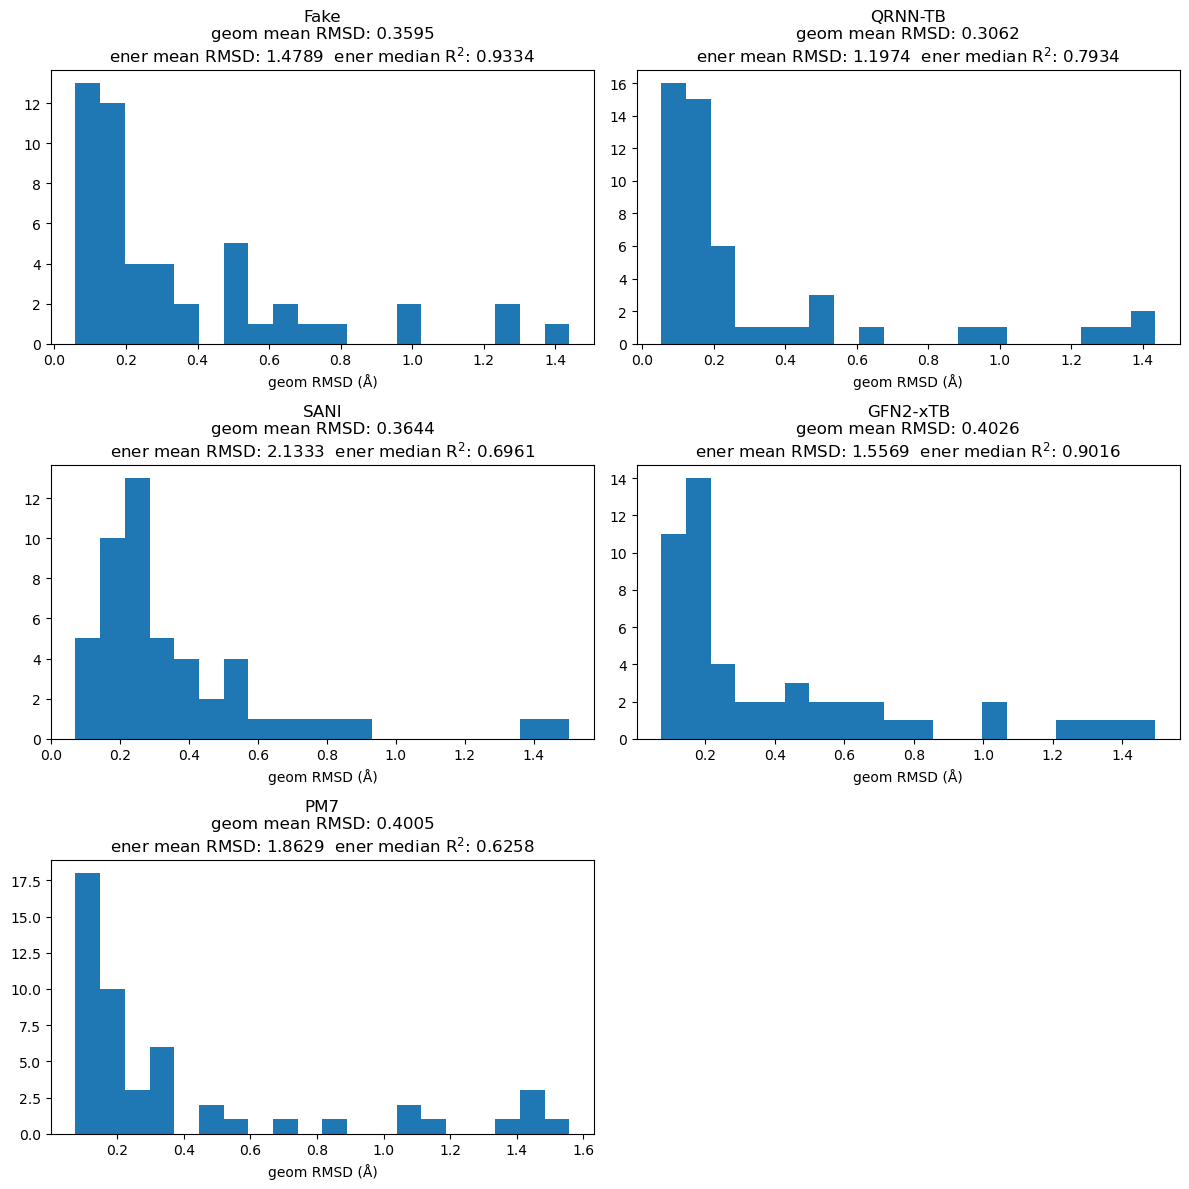

In [3]:
calc = XTB(method="GFN2-xTB")
ionic_conf = IonicConformer()
ionic_conf.tasks = ionic_conf.tasks[:50]
ionic_conf.inference("Fake", calc)

ionic_conf.analyse(methods=["Fake", "QRNN-TB", "SANI", "GFN2-xTB", "PM7"])

100%|██████████| 50/50 [01:01<00:00,  1.24s/it]


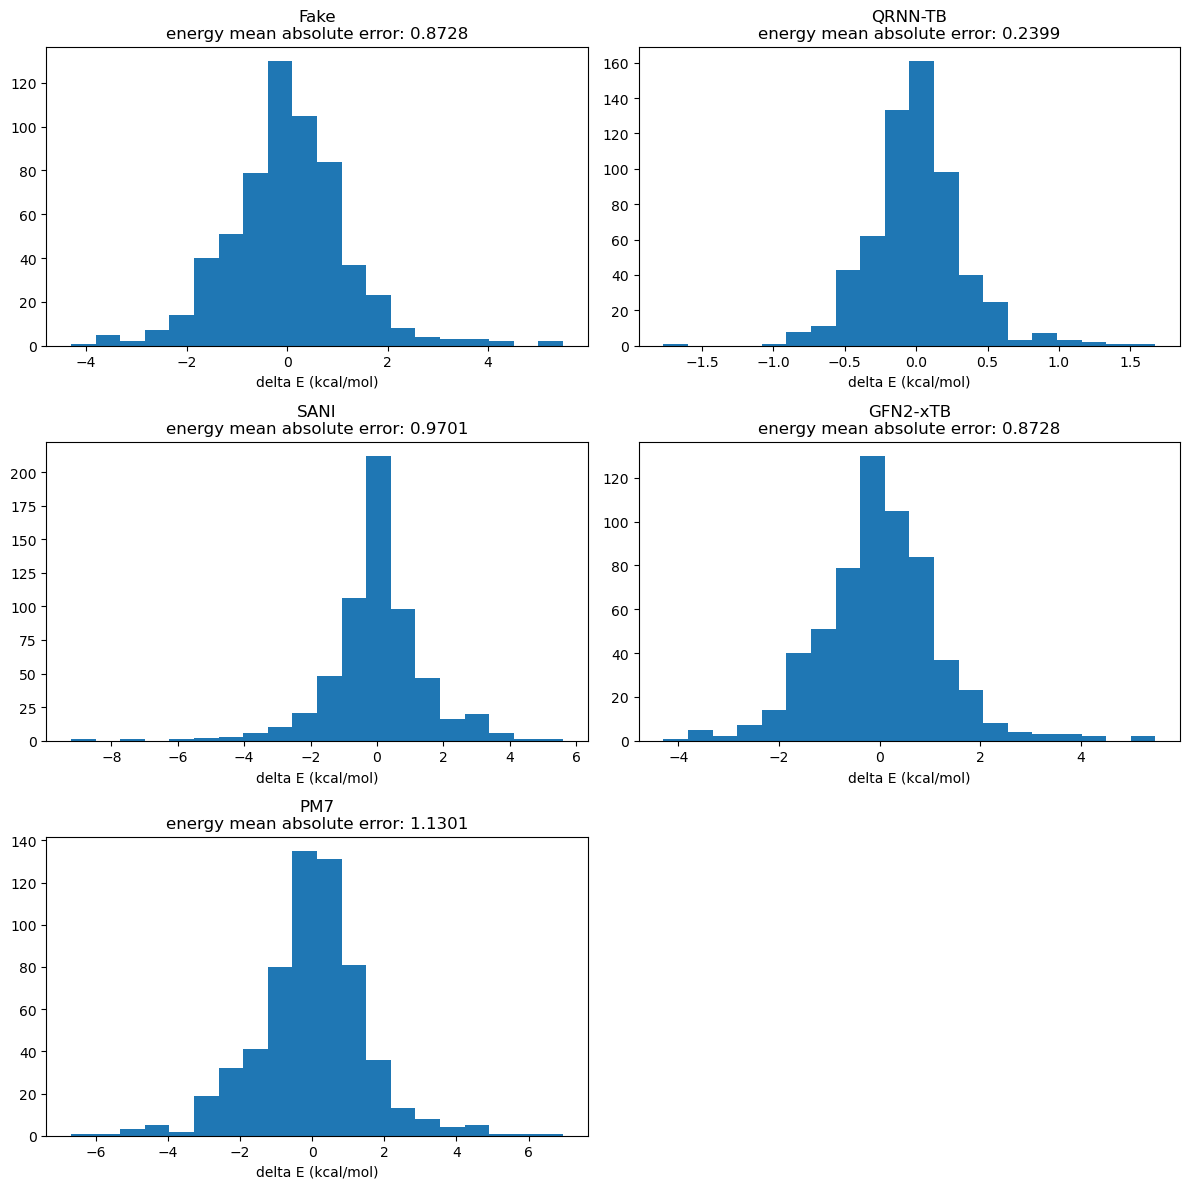

In [4]:
calc = XTB(method="GFN2-xTB")
rotamer = Rotamer()
rotamer.tasks = rotamer.tasks[:50]
rotamer.inference("Fake", calc)

rotamer.analyse(methods=["Fake", "QRNN-TB", "SANI", "GFN2-xTB", "PM7"])

100%|██████████| 50/50 [00:06<00:00,  7.41it/s]


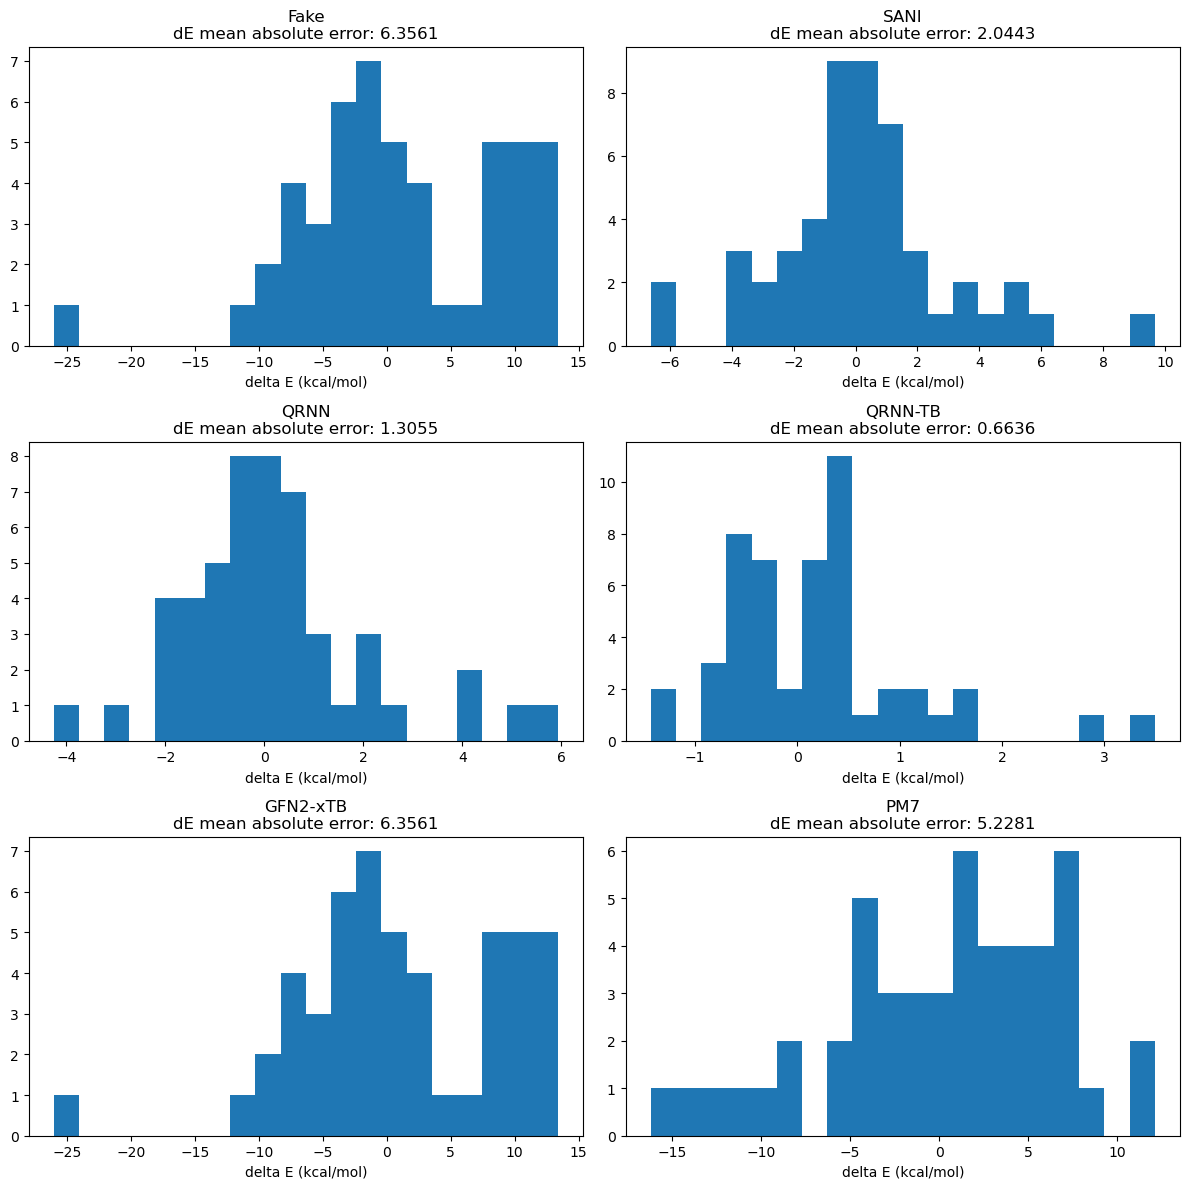

In [5]:
calc = XTB(method="GFN2-xTB")
tautomer = Tautomer()
tautomer.tasks = tautomer.tasks[:50]
tautomer.inference("Fake", calc)

tautomer.analyse(methods=["Fake", "SANI", "QRNN", "QRNN-TB", "GFN2-xTB", "PM7"])